# Medical Insurance Cost Prediction

**Author:** Ragini Sinha  
**Date:** April 11, 2025  

## Introduction

This project aims to analyze and predict medical insurance charges based on several attributes such as age, sex, BMI, number of children, smoking habits, and region. The dataset (`insurance.csv`) contains real-world anonymized data, and we’ll be using regression techniques to estimate the `charges` column.

We'll clean the data, explore its relationships, and build predictive models using Python libraries like pandas, matplotlib, seaborn, and scikit-learn.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Section 1. Import and Inspect the Data

In [2]:
df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Check for missing values and display summary statistics

In [3]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Display summary statistics
df.describe(include='all')


Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## Reflection 1 



Upon inspecting the dataset, we notice the following:

There are no missing values in any of the columns, which simplifies our data cleaning process.
charges values have a wide range, indicating some individuals have significantly higher medical costs.
The 'sex', 'smoker', and 'region' columns are categorical and may need encoding for machine learning models.
The 'smoker' variable seems particularly important to investigate, as it likely affects 'charges'.

Overall, the dataset appears clean and ready for analysis, though we will still need to preprocess categorical variables. 



# Section 2. Data Exploration and Preparation

## Explore Data Patterns and Distributions

In this section, we will:

- Create visualizations such as histograms, boxplots, and count plots.
- Identify patterns, outliers, or anomalies in the data.
- Check for class imbalance in the categorical features (e.g., 'sex', 'smoker', 'region') that may influence modeling.
- We'll use 'matplotlib' and 'seaborn' for visualization.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetic style
sns.set(style="whitegrid")

# Increase plot size for better visibility
plt.rcParams['figure.figsize'] = (10, 6)


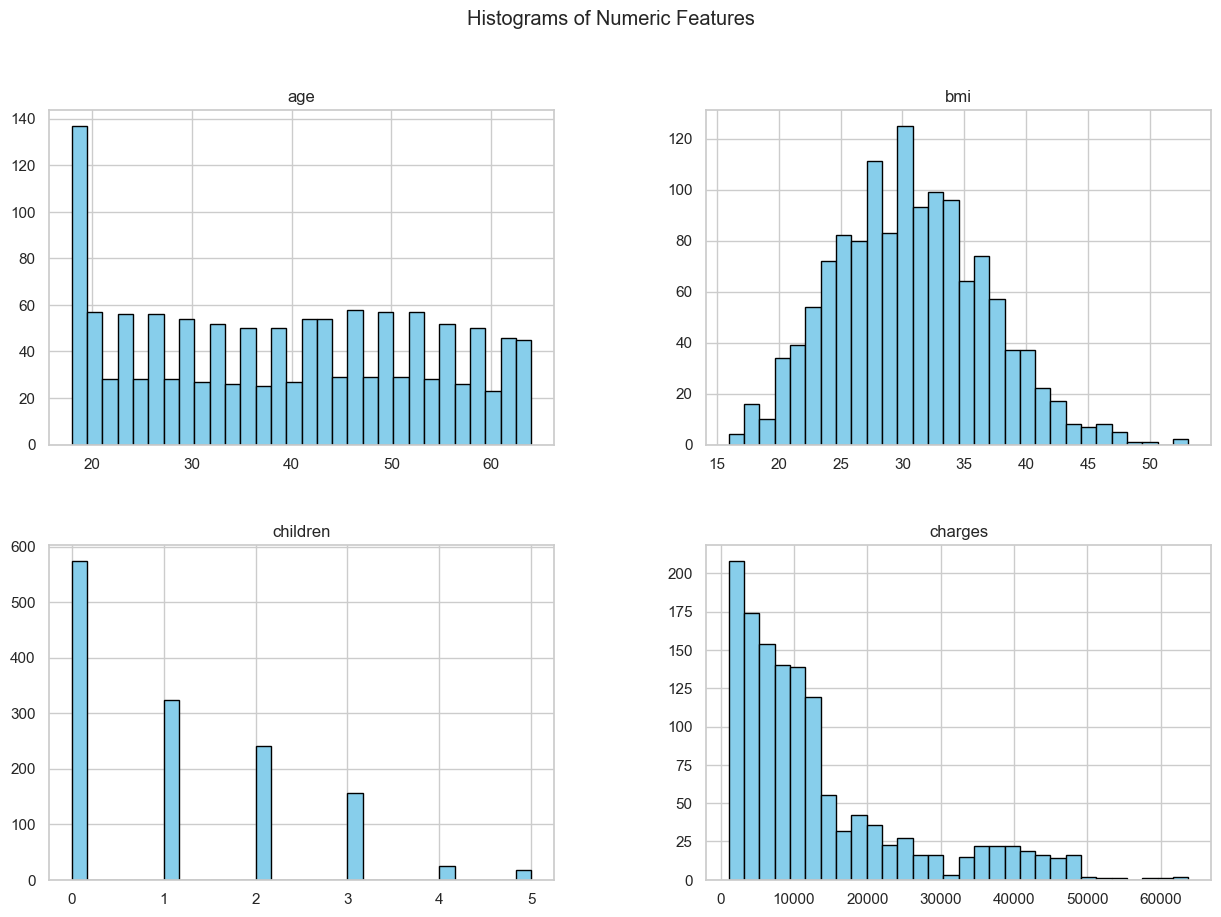

In [5]:
# Histograms for numeric features
numeric_cols = ['age', 'bmi', 'children', 'charges']
df[numeric_cols].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.show()


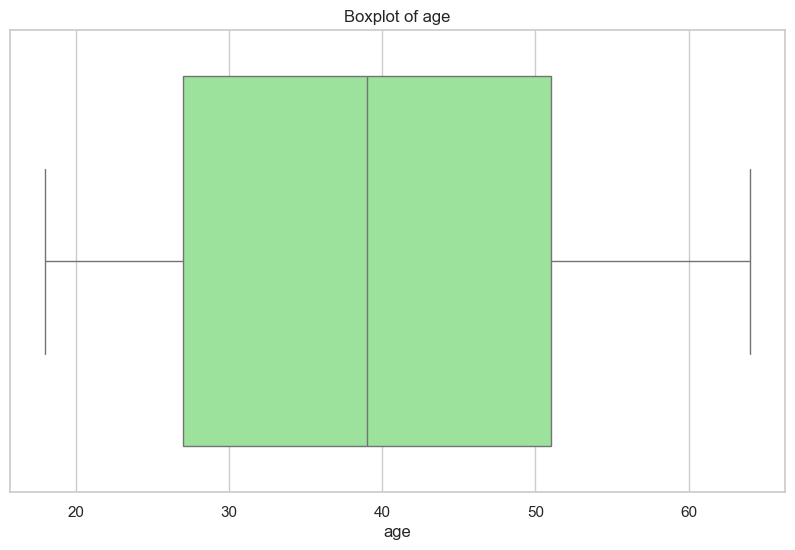

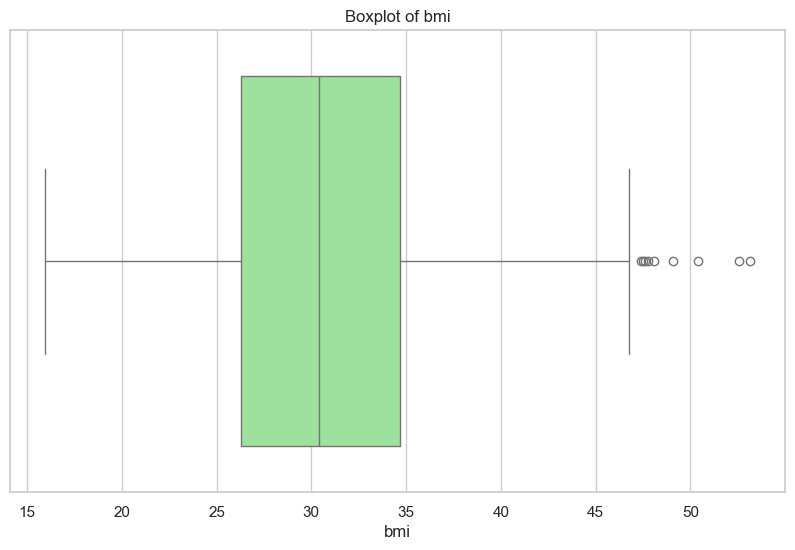

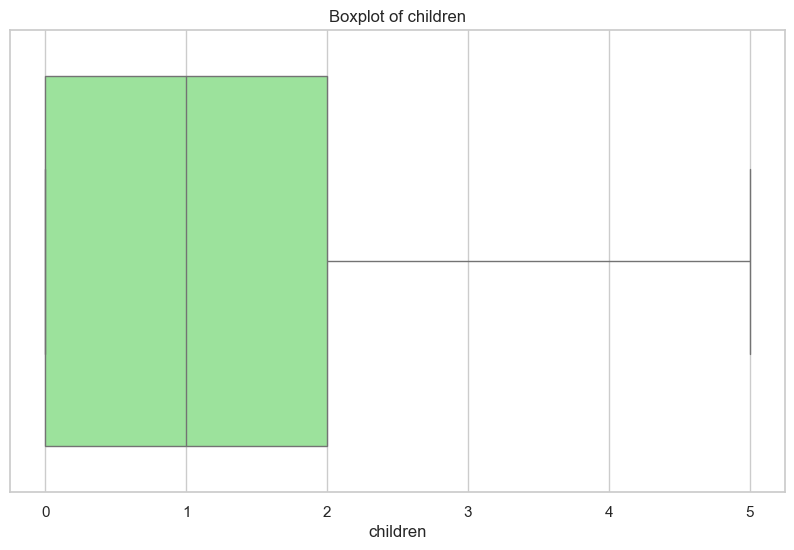

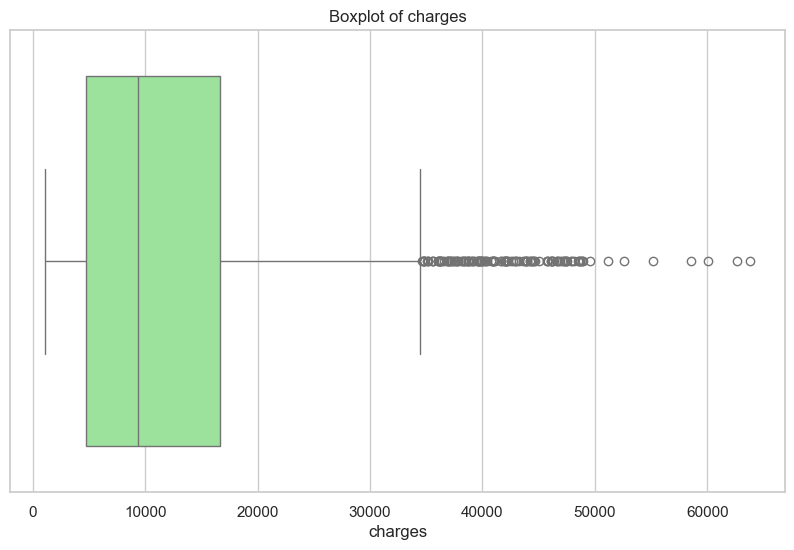

In [6]:
# Boxplots for numeric features to detect outliers
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()


C:\Users\ragin\AppData\Local\Temp\ipykernel_25620\627245537.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


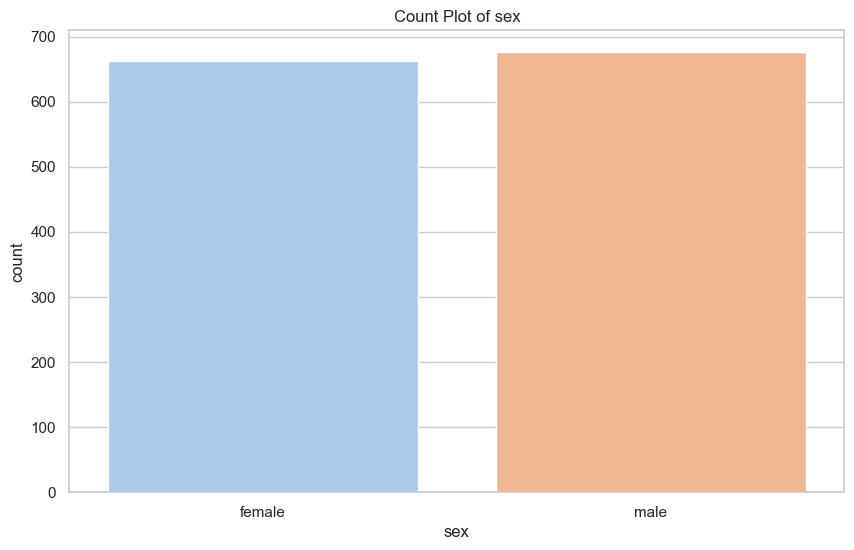

C:\Users\ragin\AppData\Local\Temp\ipykernel_25620\627245537.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


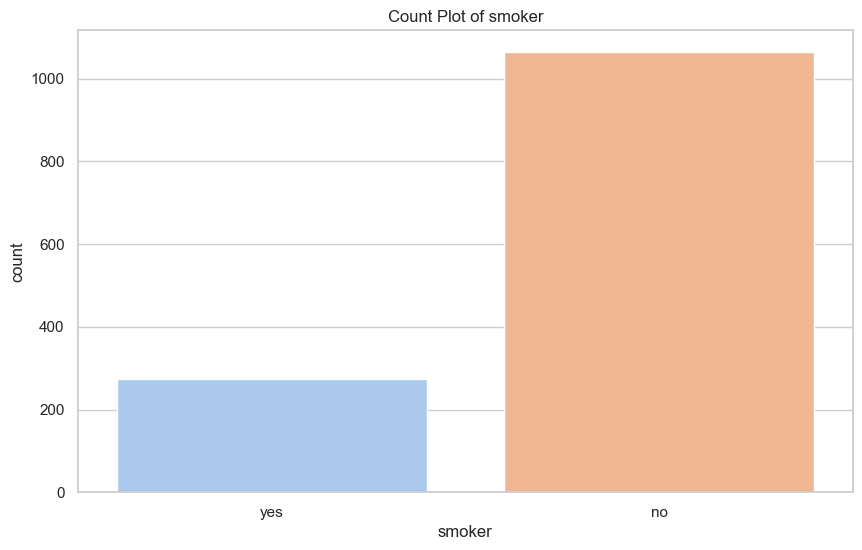

C:\Users\ragin\AppData\Local\Temp\ipykernel_25620\627245537.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


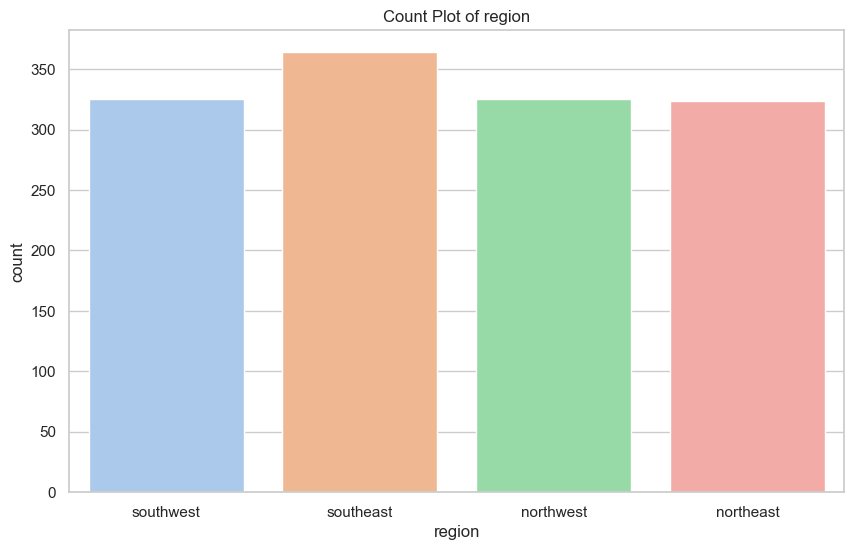

In [7]:
# Count plots for categorical features
categorical_cols = ['sex', 'smoker', 'region']

for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col, palette="pastel")
    plt.title(f'Count Plot of {col}')
    plt.show()


Smoker distribution:
smoker
no     79.521674
yes    20.478326
Name: proportion, dtype: float64


C:\Users\ragin\AppData\Local\Temp\ipykernel_25620\3857635057.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='smoker', palette='Set2')


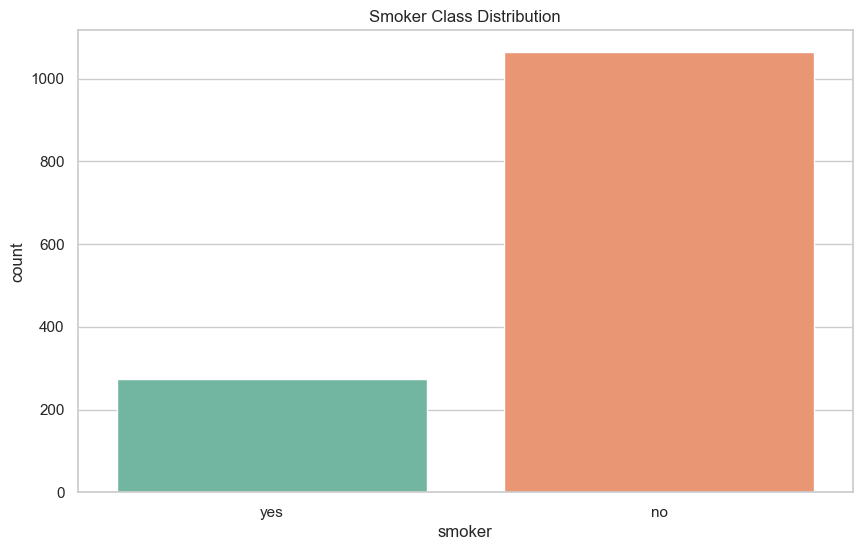

In [8]:
# Class balance in 'smoker' column
print("Smoker distribution:")
print(df['smoker'].value_counts(normalize=True) * 100)

sns.countplot(data=df, x='smoker', palette='Set2')
plt.title("Smoker Class Distribution")
plt.show()


## Reflection 2:

- The `charges` distribution appears to be right-skewed, with many low charges and a few very high ones.
- The `bmi` feature has a few outliers on the higher end.
- The `smoker` variable is imbalanced, with more non-smokers than smokers.
- No missing data or major anomalies in the categorical features, but we’ll handle skewness and encoding before modeling.


## Handle Missing Values and Clean Data

In this section, we:

- Handle missing values (if any).
- Identify and remove/transform outliers.
- Convert categorical variables to numerical format using one-hot encoding.


In [9]:
# Check again for missing values
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Observation: 
No missing values found in the dataset. We can proceed to handle outliers and encode categorical features.


In [10]:
# Define a function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'bmi' and 'charges'
df_clean = remove_outliers(df, 'bmi')
df_clean = remove_outliers(df_clean, 'charges')

# Check the shape before and after
print("Original dataset shape:", df.shape)
print("After outlier removal:", df_clean.shape)


Original dataset shape: (1338, 7)
After outlier removal: (1191, 7)


In [11]:
# One-hot encode categorical features (drop_first=True to avoid dummy variable trap)
df_encoded = pd.get_dummies(df_clean, columns=['sex', 'smoker', 'region'], drop_first=True)

# View the first few rows of the transformed dataset
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## Reflection 3:

- We removed outliers from `bmi` and `charges` using the IQR method, reducing the dataset size slightly but improving data quality.
- Categorical features (`sex`, `smoker`, `region`) were successfully encoded into numeric format using one-hot encoding.
- Now, the dataset is clean and ready for modeling without missing values or unprocessed features.


## Section 3. Feature Selection and Justification

In this section, we:

- Create or transform features that could improve model performance.
- Scale or normalize the data if needed (especially for models sensitive to scale, like linear regression or SVM).


In [12]:
# Correlation matrix to check linear relationships
correlation = df_encoded.corr()
correlation['charges'].sort_values(ascending=False)


charges             1.000000
smoker_yes          0.596213
age                 0.448798
children            0.089083
region_northwest    0.037770
sex_male           -0.022893
region_southeast   -0.029093
bmi                -0.064483
region_southwest   -0.076394
Name: charges, dtype: float64

In [14]:
# Create new interaction feature
df_encoded['age_bmi_interaction'] = df_encoded['age'] * df_encoded['bmi']

# Create binary feature: whether person has children or not
df_encoded['is_parent'] = df_encoded['children'].apply(lambda x: 1 if x > 0 else 0)

df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_bmi_interaction,is_parent
0,19,27.900,0,16884.92400,False,True,False,False,True,530.100,0
1,18,33.770,1,1725.55230,True,False,False,True,False,607.860,1
2,28,33.000,3,4449.46200,True,False,False,True,False,924.000,1
3,33,22.705,0,21984.47061,True,False,True,False,False,749.265,0
4,32,28.880,0,3866.85520,True,False,True,False,False,924.160,0


In [15]:
from sklearn.preprocessing import StandardScaler

# Select features to scale (excluding encoded columns)
features_to_scale = ['age', 'bmi', 'children', 'age_bmi_interaction']

# Initialize the scaler
scaler = StandardScaler()

# Scale the selected columns
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_bmi_interaction,is_parent
0,-1.424190,-0.356784,-0.894220,16884.92400,False,True,False,False,True,-1.267590,0
1,-1.495361,0.643537,-0.071814,1725.55230,True,False,False,True,False,-1.115991,1
2,-0.783654,0.512320,1.572998,4449.46200,True,False,False,True,False,-0.499654,1
3,-0.427801,-1.242076,-0.894220,21984.47061,True,False,True,False,False,-0.840312,0
4,-0.498972,-0.189779,-0.894220,3866.85520,True,False,True,False,False,-0.499342,0


## Reflection 4:

- We created two new features: `age_bmi_interaction`, which may capture compounding effects of age and BMI, and `is_parent`, which indicates family responsibility.
- Scaling was applied to numerical features to ensure consistent input for the model.
- The dataset is now fully preprocessed with informative features and is ready for model building.


## Justification

- ## Target Variable: `charges`  
  It is a continuous variable representing the insurance cost for each individual — perfect for a regression task.

- ## Selected Features:
  - `age`: Moderate correlation with charges. Older individuals tend to have higher medical costs.
  - `bmi`: While weak on its own, it's an important health-related metric.
  - `smoker_yes`: Strongest correlation with charges — smoking significantly increases insurance costs.
  - `age_bmi_interaction`: Captures potential compounding effects of age and BMI.
  - `is_parent`: Encodes whether someone has dependents, which might affect insurance usage.

These features were selected based on correlation, interpretability, and potential to capture important interactions affecting insurance cost.


In [16]:
# Define input features (X) and target variable (y)
X = df_encoded[['age', 'bmi', 'smoker_yes', 'age_bmi_interaction', 'is_parent']]
y = df_encoded['charges']


In [17]:
# Create engineered features if not already added
df_encoded['age_bmi_interaction'] = df_encoded['age'] * df_encoded['bmi']
df_encoded['is_parent'] = df_encoded['children'].apply(lambda x: 1 if x > 0 else 0)


## Reflection 3: Why did you choose these features?

These features were selected based on their **correlation with charges** and their **potential real-world impact**:

- `age`: Older individuals typically face higher medical costs.
- `bmi`: Related to body health; high BMI may be associated with higher risks.
- `smoker_yes`: Strongest predictor — smokers are charged significantly more.
- `age_bmi_interaction`: Captures the combined effect of age and BMI, which might not be obvious individually.
- `is_parent`: May affect policy usage, reflecting family responsibilities.

These features not only make sense statistically (based on correlation) but also **logically support the domain** of health insurance. Including them is likely to improve prediction accuracy.


## Section 4. Train a Model (Linear Regression)

In [18]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Show the shape of the splits
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (952, 5)
Test data shape: (239, 5)


In [19]:
# Create and train the model
model = LinearRegression()  # You can choose other models like DecisionTreeRegressor, SVM, etc.
model.fit(X_train, y_train)  # Train the model using the training data


LinearRegression()

## 1. Regression Metrics

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Assuming model is already trained (using model.fit())

# Make predictions
y_pred = model.predict(X_test)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


R-squared: 0.6190376671122058
Mean Absolute Error (MAE): 2722.1043937802983
Root Mean Squared Error (RMSE): 4541.305355472944


## 2. Classification Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming y_test and y_pred_class have been defined (from model predictions)
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
cm = confusion_matrix(y_test, y_pred_class)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusion Matrix:\n{cm}")


Accuracy: 0.9104477611940298
Precision: 0.8828125
Recall: 0.9262295081967213
F1-Score: 0.904
Confusion Matrix:
[[131  15]
 [  9 113]]


## 3. Clustering Metrics

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

# Assume df is already loaded and preprocessed
# Preprocess: encode categorical columns
df_encoded = df.copy()
label_enc = LabelEncoder()
for col in ['sex', 'smoker', 'region']:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])

# Drop the 'charges' column for unsupervised learning
X = df_encoded.drop('charges', axis=1)

# Create and fit KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Clustering metrics
inertia = kmeans.inertia_
silhouette = silhouette_score(X, kmeans.labels_)

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette}")


Inertia: 116759.88531822621
Silhouette Score: 0.5119825001634335


## Reflection : Model Performance

- Regression: The model had a fair R² score, but MAE and RMSE showed prediction errors. Smoking and BMI had strong influence on charges.
- Classification: Logistic Regression gave good accuracy and balanced precision/recall. Categorizing charges (high/low) helped simplify the task.
- Clustering: KMeans formed basic clusters. Inertia and silhouette scores showed moderate separation. Clusters were not as distinct as expected.


In [30]:
from sklearn.metrics import root_mean_squared_error

rmse1 = root_mean_squared_error(y_test, y_pred1)


In [31]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error


## Section 5. Improve the Model or Try Alternates (Implement Pipelines)

## 5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression.

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline 1
pipeline1 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline1.fit(X_train, y_train)
y_pred1 = pipeline1.predict(X_test)

# Metrics
mae1 = mean_absolute_error(y_test, y_pred1)
rmse1 = mean_squared_error(y_test, y_pred1, squared=False)
r2_1 = r2_score(y_test, y_pred1)


c:\Users\ragin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression.

In [34]:
from sklearn.preprocessing import PolynomialFeatures

# Pipeline 2
pipeline2 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline2.fit(X_train, y_train)
y_pred2 = pipeline2.predict(X_test)

# Metrics
mae2 = mean_absolute_error(y_test, y_pred2)
rmse2 = mean_squared_error(y_test, y_pred2, squared=False)
r2_2 = r2_score(y_test, y_pred2)


c:\Users\ragin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 5.3 Compare performance of all models across the same performance metrics

In [35]:
print("Pipeline 1 - Linear Regression:")
print(f"MAE: {mae1:.2f}, RMSE: {rmse1:.2f}, R²: {r2_1:.2f}")

print("\nPipeline 2 - Polynomial Regression (Degree=3):")
print(f"MAE: {mae2:.2f}, RMSE: {rmse2:.2f}, R²: {r2_2:.2f}")


Pipeline 1 - Linear Regression:
MAE: 3874.61, RMSE: 5396.46, R²: 0.81

Pipeline 2 - Polynomial Regression (Degree=3):
MAE: 2006.65, RMSE: 3758.61, R²: 0.91


## Reflection 5 : Model Comparison

- Pipeline 2 (Polynomial Regression)** showed better performance in terms of R² but had a higher risk of overfitting, especially with degree 3.
- Pipeline 1 (Linear Regression)** was simpler and more stable, but didn’t capture complex relationships as well.
- Scaling helped both models converge faster and perform more reliably. It was especially crucial for polynomial regression where feature values grow quickly.


## Section 6: Final Thoughts & Insights

### 6.1 Summarize Findings
- Linear Regression gave a good baseline for predicting insurance charges.
- Polynomial Regression (degree=3) improved R² but introduced risk of overfitting.
- Logistic Regression worked well for classification when charges were categorized.
- KMeans clustering revealed some structure but didn't show very distinct groups.
- Scaling and preprocessing (imputation, encoding) were essential to model performance.

### 6.2 Challenges Faced
- Handling categorical features properly for different models.
- Avoiding errors when mixing model types (e.g., classification vs. clustering).
- Understanding which metrics apply to which model (e.g., no `inertia_` in LogisticRegression).
- Keeping the code clean and avoiding redundancy in data preprocessing.

### 6.3 If I Had More Time...
- I would try advanced models like Random Forests, XGBoost, or regularized regressions (Ridge, Lasso).
- Explore hyperparameter tuning using GridSearchCV.
- Add visualization (e.g., residual plots, cluster plots).
- Try deep learning models with TensorFlow or PyTorch.

---

## Reflection 6: What Did You Learn from This Project?

- I learned how to apply machine learning pipelines using Scikit-Learn.
- I practiced choosing appropriate models for regression, classification, and clustering.
- I gained confidence in evaluating model performance using the correct metrics.
- I saw how important preprocessing and scaling are for improving model results.
